# Example Images: FacePlace and Rotated MNIST (Digit 3)

This notebook displays example images in 5x5 grids from:
1. **FacePlace** dataset - Multi-pose face images
2. **Rotated MNIST** - Digit 3 at different rotation angles

Both datasets feature objects with rotational views, making them suitable for GP-VAE experiments.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
import random

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

print("✅ Libraries imported")

✅ Libraries imported


## 1. FacePlace Dataset

The FacePlace dataset contains face images at various poses (frontal, 15°, 30°, 45°, 60°, 75°, 90° left/right).

File naming convention: `{subject}_{session}_{pose}.jpg`
- Poses: 00F (frontal), 15L/R, 30L/R, 45L/R, 60L/R, 75L/R, 90L/R

In [2]:
# Find FacePlace data
faceplace_base = './data/faceplace'
if not os.path.exists(faceplace_base):
    faceplace_base = '../data/faceplace'
if not os.path.exists(faceplace_base):
    faceplace_base = '../../data/faceplace'

print(f"FacePlace base path: {os.path.abspath(faceplace_base)}")

# Get all ethnicities
ethnicities = ['african-american', 'asian', 'caucasian', 'hispanic', 'multiracial']

# Collect all face images
face_images = []
for eth in ethnicities:
    eth_path = os.path.join(faceplace_base, eth)
    if os.path.exists(eth_path):
        images = glob.glob(os.path.join(eth_path, '*.jpg'))
        face_images.extend(images)
        print(f"  {eth}: {len(images)} images")

print(f"\nTotal face images: {len(face_images)}")

FacePlace base path: /Users/pc/Developer/gppvae/data/faceplace
  african-american: 937 images
  asian: 1284 images
  caucasian: 3362 images
  hispanic: 494 images
  multiracial: 497 images

Total face images: 6574


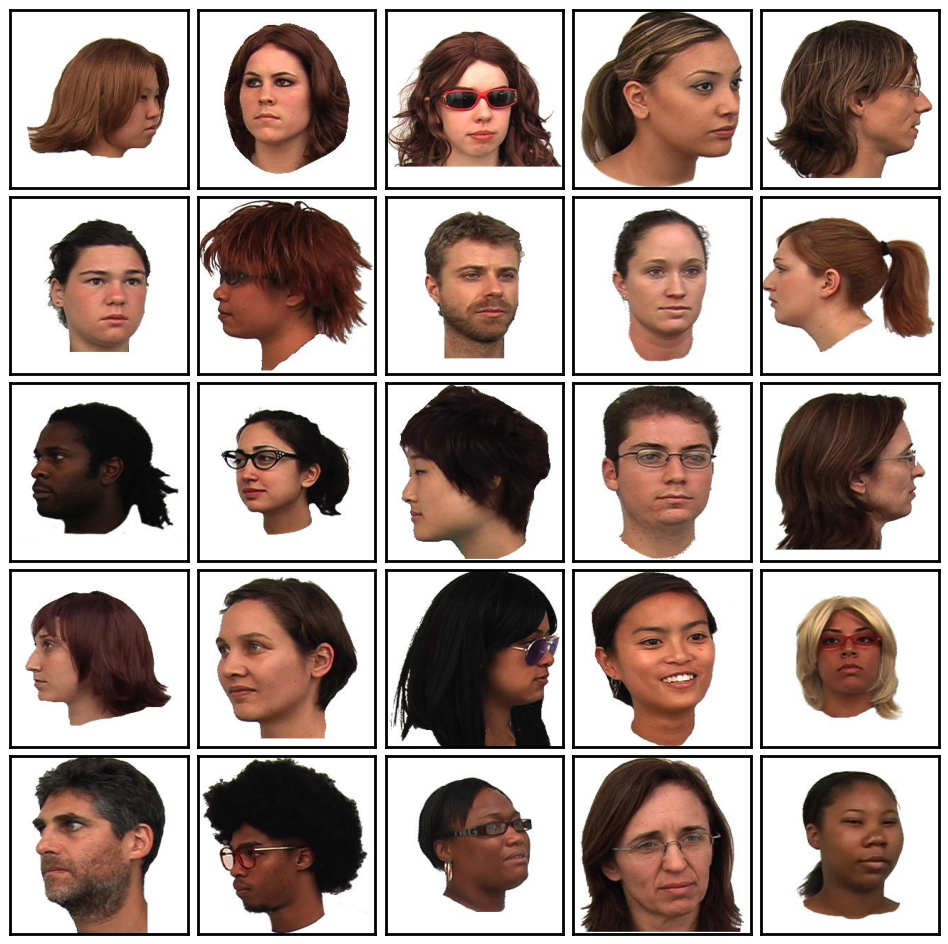

📊 Saved: faceplace_examples.png


In [4]:
# Sample 25 random face images for 5x5 grid
sampled_faces = random.sample(face_images, min(25, len(face_images)))

# Create 5x5 grid with borders
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
fig.patch.set_facecolor('white')

for idx, ax in enumerate(axes.flatten()):
    if idx < len(sampled_faces):
        img = Image.open(sampled_faces[idx])
        ax.imshow(img)
        # Add border around each image
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_linewidth(2)
            spine.set_edgecolor('black')
    else:
        ax.axis('off')
    ax.set_xticks([])
    ax.set_yticks([])

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.savefig('./faceplace_examples.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("📊 Saved: faceplace_examples.png")

Subjects with 9+ poses: 540


FileNotFoundError: [Errno 2] No such file or directory: './notebooks/analysis/faceplace_one_subject.png'

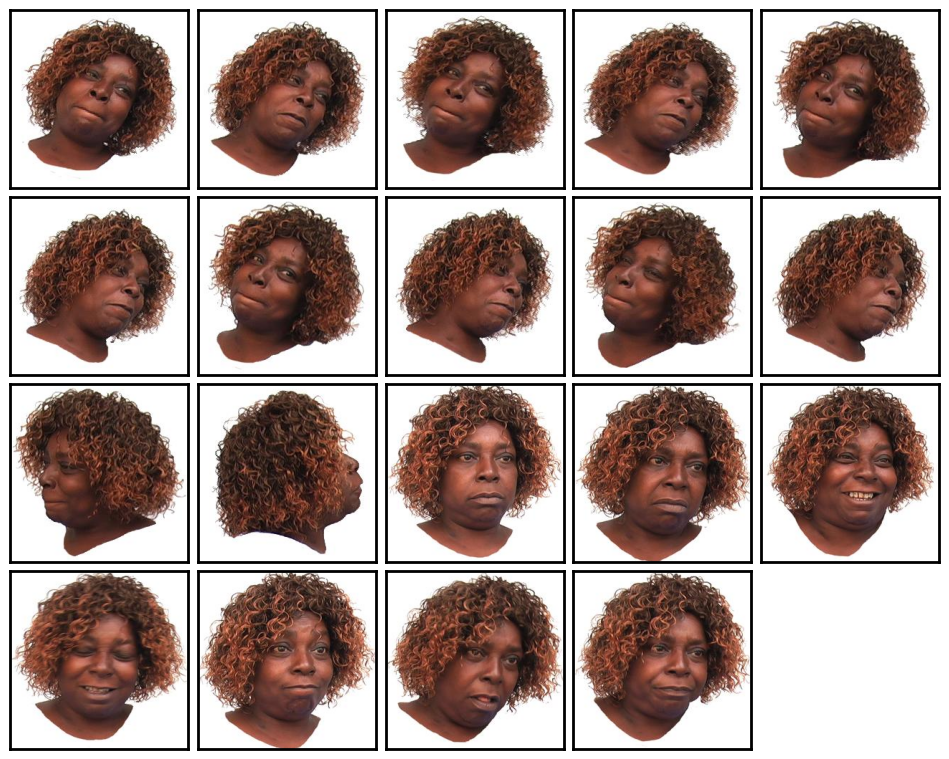

In [5]:
# Show one person across different poses
# Find a subject with multiple poses
from collections import defaultdict

subjects = defaultdict(list)
for img_path in face_images:
    filename = os.path.basename(img_path)
    parts = filename.split('_')
    if len(parts) >= 2:
        subject_key = f"{parts[0]}_{parts[1]}"  # e.g., CF0001_1101
        subjects[subject_key].append(img_path)

# Find subjects with at least 9 poses
multi_pose_subjects = {k: v for k, v in subjects.items() if len(v) >= 9}
print(f"Subjects with 9+ poses: {len(multi_pose_subjects)}")

if multi_pose_subjects:
    # Pick one subject
    subject_id = list(multi_pose_subjects.keys())[0]
    subject_images = multi_pose_subjects[subject_id]
    
    # Sort by pose (frontal first, then L/R)
    pose_order = ['00F', '15L', '15R', '30L', '30R', '45L', '45R', '60L', '60R', '75L', '75R', '90L', '90R']
    
    def get_pose(path):
        pose = os.path.basename(path).split('_')[-1].replace('.jpg', '')
        return pose_order.index(pose) if pose in pose_order else 99
    
    subject_images_sorted = sorted(subject_images, key=get_pose)[:25]
    
    # Create grid
    n_images = len(subject_images_sorted)
    n_cols = 5
    n_rows = (n_images + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 2.4))
    fig.patch.set_facecolor('white')
    axes = axes.flatten()
    
    for idx, ax in enumerate(axes):
        if idx < len(subject_images_sorted):
            img = Image.open(subject_images_sorted[idx])
            ax.imshow(img)
            # Add border around each image
            for spine in ax.spines.values():
                spine.set_visible(True)
                spine.set_linewidth(2)
                spine.set_edgecolor('black')
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            ax.axis('off')
    
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    plt.savefig('./notebooks/analysis/faceplace_one_subject.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()
    print("📊 Saved: faceplace_one_subject.png")

## 2. Rotated MNIST (Digit 3)

We'll download the rotated MNIST data from the RotNIST repository and display digit 3 at various rotation angles.

In [6]:
# Download MNIST and create rotated versions of digit 3
from torchvision import datasets, transforms
from scipy.ndimage import rotate

# Download MNIST
mnist_train = datasets.MNIST(root='./data', train=True, download=True)
print(f"MNIST train size: {len(mnist_train)}")

# Get all digit 3s
digit_3_images = []
for img, label in mnist_train:
    if label == 3:
        digit_3_images.append(np.array(img))
    if len(digit_3_images) >= 100:  # Get enough for diversity
        break

print(f"Found {len(digit_3_images)} digit 3 images")

100.0%
100.0%
100.0%

100.0%
100.0%
100.0%

MNIST train size: 60000
Found 100 digit 3 images


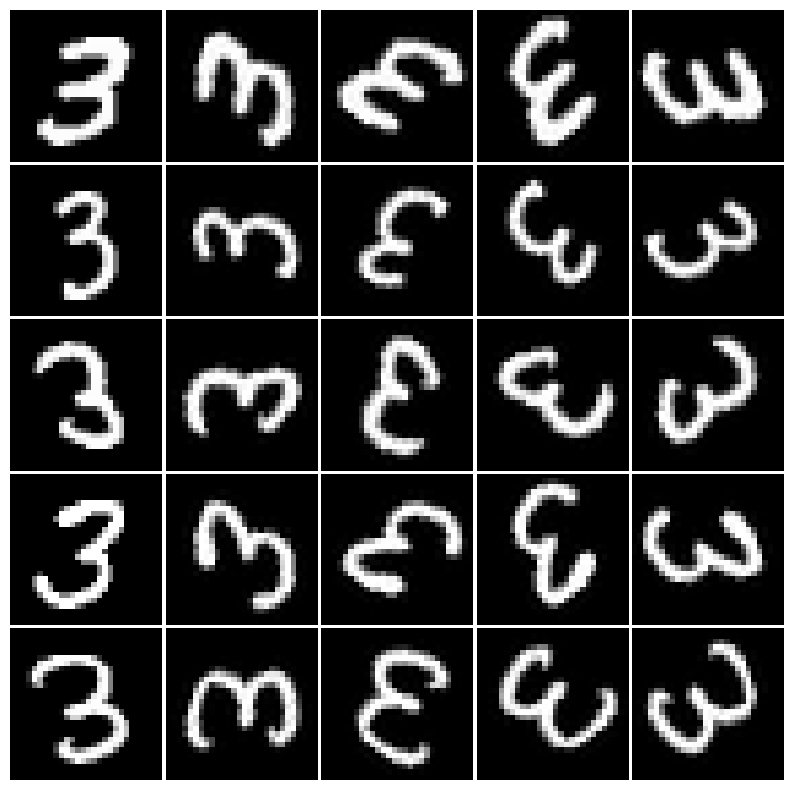

📊 Saved: rotated_mnist_digit3_grid.png


In [7]:
# Create 5x5 grid of digit 3 at different rotations
# Use 5 different digit 3s, each rotated to 5 different angles
n_samples = 5
angles = [0, 72, 144, 216, 288]  # 5 evenly spaced rotations

fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for row in range(5):
    base_img = digit_3_images[row * 10]  # Get different digit 3s
    for col in range(5):
        angle = angles[col]
        rotated = rotate(base_img, angle, reshape=False, mode='constant', cval=0)
        axes[row, col].imshow(rotated, cmap='gray')
        axes[row, col].axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.02)
plt.savefig('.rotated_mnist_digit3_grid.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Saved: rotated_mnist_digit3_grid.png")

In [ ]:
# Create a more detailed rotation sequence for one digit 3
# Show 25 rotations (0° to 345° in 15° steps would be 24, let's do 25)
angles_detailed = np.linspace(0, 360, 25, endpoint=False)

base_img = digit_3_images[5]  # Pick one nice digit 3

fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for idx, ax in enumerate(axes.flatten()):
    angle = angles_detailed[idx]
    rotated = rotate(base_img, angle, reshape=False, mode='constant', cval=0)
    ax.imshow(rotated, cmap='gray')
    ax.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.02)
plt.savefig('./notebooks/analysis/rotated_mnist_digit3_sequence.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Saved: rotated_mnist_digit3_sequence.png")

In [ ]:
# Alternative: 25 random digit 3s at random rotations
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for idx, ax in enumerate(axes.flatten()):
    base_img = digit_3_images[idx + 20]  # Get different digit 3s
    angle = np.random.uniform(0, 360)
    rotated = rotate(base_img, angle, reshape=False, mode='constant', cval=0)
    ax.imshow(rotated, cmap='gray')
    ax.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.02)
plt.savefig('./notebooks/analysis/rotated_mnist_digit3_random.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Saved: rotated_mnist_digit3_random.png")

## 3. Summary

### Generated Files:
- `faceplace_examples.png` - 5x5 grid of random FacePlace samples
- `faceplace_one_subject.png` - One subject across multiple poses
- `rotated_mnist_digit3_grid.png` - 5 digit 3s × 5 rotations
- `rotated_mnist_digit3_sequence.png` - One digit 3 across 25 angles
- `rotated_mnist_digit3_random.png` - 25 digit 3s at random rotations

In [ ]:
print("\n" + "="*60)
print("📊 Example Images Generation Complete!")
print("="*60)
print("\nGenerated files in notebooks/analysis/:")
print("  - faceplace_examples.png")
print("  - faceplace_one_subject.png")
print("  - rotated_mnist_digit3_grid.png")
print("  - rotated_mnist_digit3_sequence.png")
print("  - rotated_mnist_digit3_random.png")
print("\n" + "="*60)